In [1]:
# built-in
import random
import copy
import sys

# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# stats
import scipy.stats as st

# pd options
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)

In [2]:
sys.path.append("../")
from utils import generate_eda, plot_venn2, plot_distributions

In [3]:
# generate_eda()

In [4]:
train = pd.read_csv("../data/raw/train_fixed.csv")
test = pd.read_csv("../data/raw/test_fixed.csv")

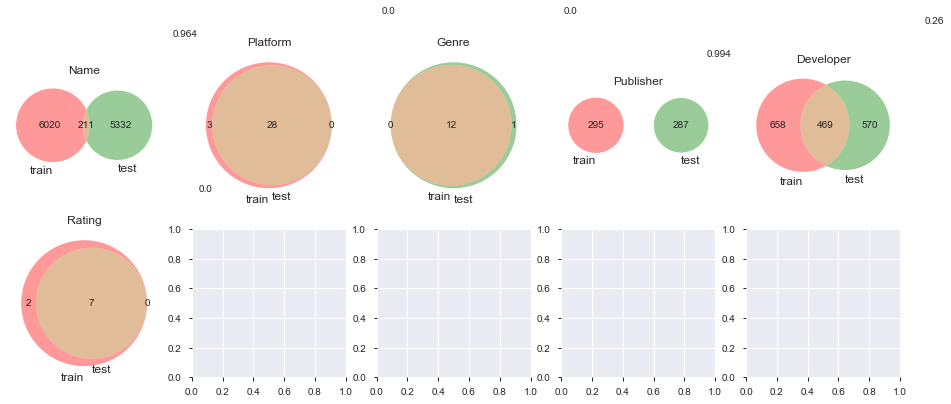

In [5]:
categorical_cols = ["Name", "Platform", "Genre", "Publisher", "Developer", "Rating"]
plot_venn2(train, test, include_cols=categorical_cols)

In [6]:
train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


In [7]:
whole_df = pd.concat([train, test], ignore_index=True)

In [8]:
train_test_name_intersections = set(train["Name"]).intersection(set(test["Name"]))

In [9]:
train["Name"].isin(train_test_name_intersections).sum() / len(train)

0.03612872353152291

In [10]:
test["Name"].isin(train_test_name_intersections).sum() / len(test)

0.03624401913875598

In [11]:
name = list(train_test_name_intersections)[3]

In [12]:
train[train["Name"] == name]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
7055,Time Travelers,PSV,2012.0,Adventure,Level 5,0,0,5,0,5,NaN,NaN,NaN,NaN,NaN,NaN
7072,Time Travelers,PSP,2012.0,Adventure,Level 5,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test[test["Name"] == name]

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
7064,Time Travelers,3DS,2012.0,Adventure,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
correct_idx = test.index[test["Name"].isin(train_test_name_intersections)]

In [19]:
def manually_correct_prediction(test_idx):
    same_title = test.loc[test_idx, "Name"]
    base_pred = train[train["Name"] == same_title].iloc[0]["Global_Sales"]  # 複数あれば一個
    base_platform = train[train["Name"] == same_title].iloc[0]["Platform"]
    base_year = train[train["Name"] == same_title].iloc[0]["Year_of_Release"]

    test_platform = test.loc[test_idx, "Platform"]
    test_year = test.loc[test_idx, "Year_of_Release"]

    if pd.isnull(test_platform) or pd.isnull(test_year):
        return np.nan

    # platform
    
    base_pred *= platform_sales_medians[test_platform] / platform_sales_medians[base_platform]

    # year
    base_pred *= year_sales_medians[test_year] / year_sales_medians[base_year]
    return base_pred


In [24]:
ret = []
for i in correct_idx:
    ret.append(manually_correct_prediction(i))

KeyError: nan

In [21]:
platform_sales_medians = whole_df.groupby("Platform")["Global_Sales"].median()

In [22]:
year_sales_medians = whole_df.groupby("Year_of_Release")["Global_Sales"].median()

In [23]:
platform_sales_medians

Platform
2600     47.0
3DO       2.0
3DS      20.0
DC       12.0
DS       11.0
GB      122.0
GBA      20.0
GC       17.0
GEN      13.0
GG        4.0
N64      36.0
NES     171.0
NG       13.0
PC        4.0
PCFX      3.0
PS       28.0
PS2      21.0
PS3      28.0
PS4      20.0
PSP       8.0
PSV       6.0
SAT      12.0
SCD       6.5
SNES     38.5
TG16     14.0
WS       38.0
Wii      21.0
WiiU     36.0
X360     27.5
XB       12.0
XOne     22.0
Name: Global_Sales, dtype: float64